In [1]:
from main import *
import matplotlib.pyplot as plt
import time 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [46]:
population, score_evolution = run_simulation(generations=5, population_size=5, mutations_per_division=2, retall=True)

Generation 0 : 1.4 edges in average network
Generation 1 : 3 edges in average network
Generation 2 : 4.6 edges in average network
Generation 3 : 5.4 edges in average network
Generation 4 : 5.8 edges in average network


[4, 6, 8]

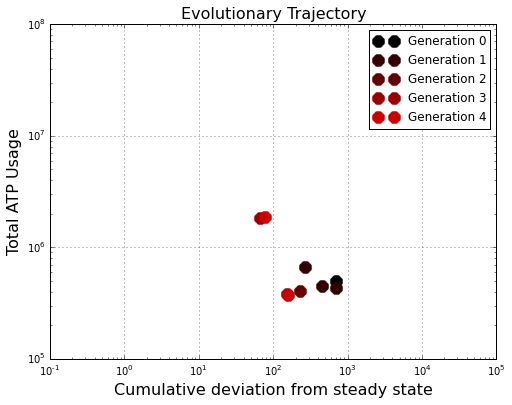

In [48]:
# ax1 = plot_1D_trajectory(score_evolution, obj=1)
ax2 = plot_2D_trajectory(score_evolution, obj=(0, 1))
ax2.set_xlim(1e-1, 1e5)
ax2.set_ylim(1e5, 1e8)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_ylabel('Total ATP Usage')
ax2.set_xlabel('Cumulative deviation from steady state')

In [36]:
# for gen, scores in score_evolution.items():
#     print('Generation:', gen)
#     print('Scores:', scores)
#     print('\n')

In [35]:
# import pickle as pickle
# pickle.dump(population, open( "population.p", "wb" ) )
# pickle.dump(score_evolution, open( "score_evolution.p", "wb" ) )

[188.64839644376653, 400639.76457987132]

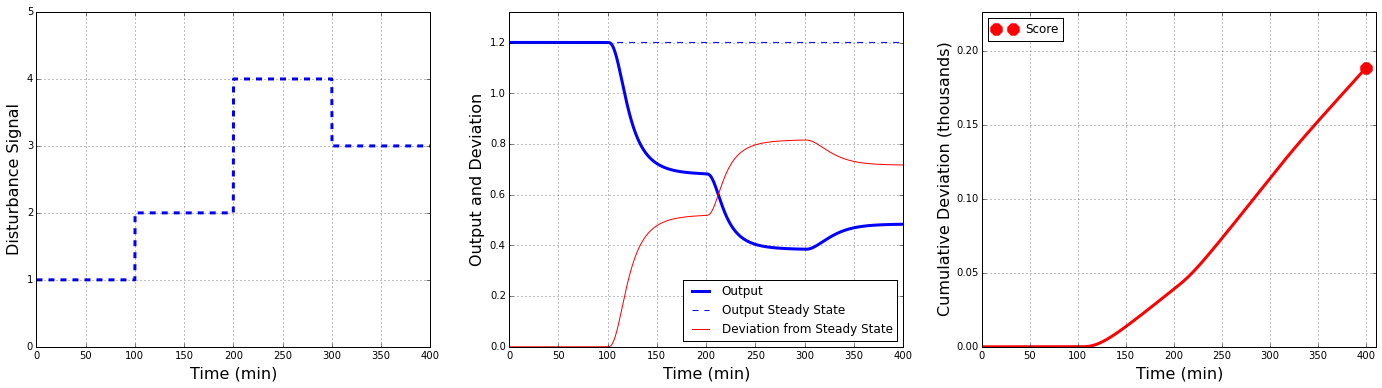

In [52]:
cell = population[0]

get_fitness_2(cell, plot=True)